**Importing necessary libraries** 

**Notebook Summary**
Problem: Object Recognition model for CIFAR10
Environment: Jupyter,Keras

Input: CIFAR10 dataset containing 10 classes of images with shape(32,32,3)
Output: CNN multilabel classification model with 86.57% validation accuracy

**Model architecture:** 
Total layers: 17
Types of layers: Conv2d,Batch Normalization,MaxPool and Dropout(regularization)
Total Epochs: 170





In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPool2D, Activation, MaxPooling2D
from keras.layers.normalization import BatchNormalization

# Annealer
from keras.callbacks import LearningRateScheduler

# Data processing
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.preprocessing import image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Progressor
from tqdm import tqdm


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
num_classes=10
y_train =to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [0]:
# Training data processing
x_train = Scale_Reshape(x_train)

# Test data processing
x_test = Scale_Reshape(x_test)


In [0]:
##17 layered network
model = Sequential()

model.add(Conv2D(32,  kernel_size = 3,kernel_initializer='he_normal', activation='relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size = 3, kernel_initializer='he_normal', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size = 3, strides=1, kernel_initializer='he_normal' ,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size = 3,kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512,kernel_initializer='he_normal', activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

# Summary of model
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)    

In [0]:
datagen = ImageDataGenerator(
        rotation_range=0,  
        zoom_range = 0.0,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False)

# data generator model to train and validation set
batch_size_1 = 32
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size_1)
val_gen = datagen.flow(x_test, y_test, batch_size=batch_size_1)

In [17]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1562/1562 [==============================] - 44s 28ms/step - loss: 1.5471 - acc: 0.4575 - val_loss: 1.2712 - val_acc: 0.5483
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.1432 - acc: 0.6001 - val_loss: 1.0439 - val_acc: 0.6296
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9919 - acc: 0.6537 - val_loss: 0.9102 - val_acc: 0.6794
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9060 - acc: 0.6869 - val_loss: 0.9225 - val_acc: 0.6794
Epoch 5/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8361 - acc: 0.7114 - val_loss: 0.7732 - val_acc: 0.7293
Epoch 6/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.7892 - acc: 0.7293 - val_loss: 0.8013 - val_acc: 0.7323
Epoch 7/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.7469 - a

In [18]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.6356 - acc: 0.7805 - val_loss: 0.6945 - val_acc: 0.7677
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.6227 - acc: 0.7873 - val_loss: 0.7172 - val_acc: 0.7545
Epoch 3/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.6042 - acc: 0.7904 - val_loss: 0.6472 - val_acc: 0.7833
Epoch 4/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5821 - acc: 0.8001 - val_loss: 0.6598 - val_acc: 0.7758
Epoch 6/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.5699 - acc: 0.8031 - val_loss: 0.6002 - val_acc: 0.7929
Epoch 7/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.5566 - acc: 0.8076 - val_loss: 0.5953 - val_acc: 0.8001
Epoch 8/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.5504 - acc: 0.8109 - val_loss: 0.6156 - val_acc: 0.7870
Epoch 9/10
1562/1562 [==========================

In [19]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5209 - acc: 0.8198 - val_loss: 0.5463 - val_acc: 0.8136
Epoch 2/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5208 - acc: 0.8199 - val_loss: 0.5727 - val_acc: 0.8114
Epoch 3/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5078 - acc: 0.8260 - val_loss: 0.5652 - val_acc: 0.8101
Epoch 4/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4960 - acc: 0.8295 - val_loss: 0.5636 - val_acc: 0.8118
Epoch 5/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4872 - acc: 0.8325 - val_loss: 0.7558 - val_acc: 0.7655
Epoch 6/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4827 - acc: 0.8354 - val_loss: 0.6182 - val_acc: 0.8000
Epoch 7/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4814 - acc: 0.8345 - val_loss: 0.5733 - val_acc: 0.8099
Epoch 8/10
1562/1562 [==========================

In [20]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4571 - acc: 0.8437 - val_loss: 0.5576 - val_acc: 0.8127
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4505 - acc: 0.8439 - val_loss: 0.5387 - val_acc: 0.8178
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4511 - acc: 0.8444 - val_loss: 0.5600 - val_acc: 0.8120
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4525 - acc: 0.8429 - val_loss: 0.5879 - val_acc: 0.8029
Epoch 5/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4429 - acc: 0.8487 - val_loss: 0.5790 - val_acc: 0.8095
Epoch 6/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4373 - acc: 0.8480 - val_loss: 0.5652 - val_acc: 0.8103
Epoch 7/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4302 - acc: 0.8546 - val_loss: 0.5839 - val_acc: 0.8102
Epoch 8/10
1562/1562 [==========================

In [21]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4146 - acc: 0.8574 - val_loss: 0.6129 - val_acc: 0.8047
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4222 - acc: 0.8540 - val_loss: 0.5287 - val_acc: 0.8264
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4106 - acc: 0.8576 - val_loss: 0.5356 - val_acc: 0.8212
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4110 - acc: 0.8579 - val_loss: 0.5252 - val_acc: 0.8224
Epoch 5/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4010 - acc: 0.8622 - val_loss: 0.5773 - val_acc: 0.8104
Epoch 6/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3974 - acc: 0.8632 - val_loss: 0.6140 - val_acc: 0.8055
Epoch 7/10
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4027 - acc: 0.8620 - val_loss: 0.5129 - val_acc: 0.8269
Epoch 8/10
1562/1562 [==========================

In [22]:
history = model.fit_generator(train_gen, 
                              epochs = 30, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/30
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3813 - acc: 0.8684 - val_loss: 0.5396 - val_acc: 0.8222
Epoch 2/30
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3861 - acc: 0.8659 - val_loss: 0.5325 - val_acc: 0.8186
Epoch 3/30
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3852 - acc: 0.8666 - val_loss: 0.5569 - val_acc: 0.8225
Epoch 4/30
1562/1562 [==============================] - 35s 23ms/step - loss: 0.3856 - acc: 0.8671 - val_loss: 0.5699 - val_acc: 0.8176
Epoch 5/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3744 - acc: 0.8699 - val_loss: 0.5387 - val_acc: 0.8246
Epoch 6/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3756 - acc: 0.8699 - val_loss: 0.5200 - val_acc: 0.8316
Epoch 7/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3731 - acc: 0.8721 - val_loss: 0.5073 - val_acc: 0.8326
Epoch 8/30
1562/1562 [==========================

In [28]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3365 - acc: 0.8842 - val_loss: 0.5085 - val_acc: 0.8390
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3344 - acc: 0.8849 - val_loss: 0.5350 - val_acc: 0.8358
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3255 - acc: 0.8877 - val_loss: 0.4923 - val_acc: 0.8425
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3300 - acc: 0.8864 - val_loss: 0.5334 - val_acc: 0.8354
Epoch 5/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3252 - acc: 0.8874 - val_loss: 0.5536 - val_acc: 0.8194
Epoch 6/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3206 - acc: 0.8884 - val_loss: 0.5168 - val_acc: 0.8378
Epoch 7/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3284 - acc: 0.8864 - val_loss: 0.5010 - val_acc: 0.8379
Epoch 8/10
1562/1562 [==========================

In [30]:
history = model.fit_generator(train_gen, 
                              epochs = 30, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/30
1562/1562 [==============================] - 38s 24ms/step - loss: 0.3209 - acc: 0.8901 - val_loss: 0.4989 - val_acc: 0.8396
Epoch 2/30
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3175 - acc: 0.8897 - val_loss: 0.5194 - val_acc: 0.8344
Epoch 3/30
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3169 - acc: 0.8910 - val_loss: 0.5193 - val_acc: 0.8356
Epoch 4/30
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3113 - acc: 0.8920 - val_loss: 0.5191 - val_acc: 0.8404
Epoch 5/30
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3139 - acc: 0.8920 - val_loss: 0.5575 - val_acc: 0.8235
Epoch 6/30
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3122 - acc: 0.8921 - val_loss: 0.5489 - val_acc: 0.8278
Epoch 7/30
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3140 - acc: 0.8921 - val_loss: 0.5278 - val_acc: 0.8368
Epoch 8/30
1562/1562 [==========================

In [34]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.2878 - acc: 0.9000 - val_loss: 0.5004 - val_acc: 0.8420
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.2903 - acc: 0.9002 - val_loss: 0.5062 - val_acc: 0.8354
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.2882 - acc: 0.9009 - val_loss: 0.5018 - val_acc: 0.8463
Epoch 4/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2882 - acc: 0.9016 - val_loss: 0.5073 - val_acc: 0.8408
Epoch 5/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.2846 - acc: 0.9024 - val_loss: 0.5215 - val_acc: 0.8409
Epoch 6/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2886 - acc: 0.9012 - val_loss: 0.5385 - val_acc: 0.8352
Epoch 7/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2915 - acc: 0.9000 - val_loss: 0.5087 - val_acc: 0.8392
Epoch 8/10
1562/1562 [==========================

In [36]:
history = model.fit_generator(train_gen, 
                              epochs = 30, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/30
1562/1562 [==============================] - 35s 22ms/step - loss: 0.2847 - acc: 0.9023 - val_loss: 0.4929 - val_acc: 0.8480
Epoch 2/30
1562/1562 [==============================] - 35s 22ms/step - loss: 0.2849 - acc: 0.9013 - val_loss: 0.5415 - val_acc: 0.8374
Epoch 3/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2833 - acc: 0.9029 - val_loss: 0.5365 - val_acc: 0.8323
Epoch 4/30
1562/1562 [==============================] - 35s 23ms/step - loss: 0.2861 - acc: 0.9033 - val_loss: 0.4859 - val_acc: 0.8490
Epoch 5/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2833 - acc: 0.9025 - val_loss: 0.5526 - val_acc: 0.8353
Epoch 6/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2780 - acc: 0.9038 - val_loss: 0.5498 - val_acc: 0.8383
Epoch 7/30
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2832 - acc: 0.9025 - val_loss: 0.5205 - val_acc: 0.8369
Epoch 8/30
1562/1562 [==========================

In [38]:
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_1,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_1,
                              verbose=1)

Epoch 1/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2680 - acc: 0.9076 - val_loss: 0.5281 - val_acc: 0.8424
Epoch 2/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2650 - acc: 0.9099 - val_loss: 0.5415 - val_acc: 0.8497
Epoch 3/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2632 - acc: 0.9106 - val_loss: 0.5074 - val_acc: 0.8479
Epoch 4/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2666 - acc: 0.9076 - val_loss: 0.4859 - val_acc: 0.8474
Epoch 5/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2631 - acc: 0.9090 - val_loss: 0.4963 - val_acc: 0.8467
Epoch 6/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.2613 - acc: 0.9100 - val_loss: 0.5285 - val_acc: 0.8452
Epoch 7/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2654 - acc: 0.9087 - val_loss: 0.4996 - val_acc: 0.8475
Epoch 8/10
1562/1562 [==========================

In [42]:
batch_size_2=64
history = model.fit_generator(train_gen, 
                              epochs = 10, 
                              steps_per_epoch = x_train.shape[0] // batch_size_2,
                              validation_data = val_gen,
                              validation_steps = x_test.shape[0] // batch_size_2,
                              verbose=1)

Epoch 1/10
781/781 [==============================] - 16s 21ms/step - loss: 0.2552 - acc: 0.9104 - val_loss: 0.5150 - val_acc: 0.8476
Epoch 2/10
781/781 [==============================] - 16s 21ms/step - loss: 0.2688 - acc: 0.9073 - val_loss: 0.5174 - val_acc: 0.8450
Epoch 3/10
781/781 [==============================] - 17s 21ms/step - loss: 0.2508 - acc: 0.9129 - val_loss: 0.5193 - val_acc: 0.8485
Epoch 4/10
781/781 [==============================] - 16s 21ms/step - loss: 0.2614 - acc: 0.9084 - val_loss: 0.5049 - val_acc: 0.8472
Epoch 5/10
781/781 [==============================] - 17s 21ms/step - loss: 0.2616 - acc: 0.9122 - val_loss: 0.5392 - val_acc: 0.8467
Epoch 6/10
781/781 [==============================] - 16s 21ms/step - loss: 0.2673 - acc: 0.9108 - val_loss: 0.5709 - val_acc: 0.8333
Epoch 7/10
781/781 [==============================] - 17s 21ms/step - loss: 0.2543 - acc: 0.9128 - val_loss: 0.5308 - val_acc: 0.8459
Epoch 8/10
781/781 [==============================] - 16s 21ms

In [43]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

10000/10000 [==============================] - 1s 120us/step
Final loss: 0.4705, final accuracy: 0.8657


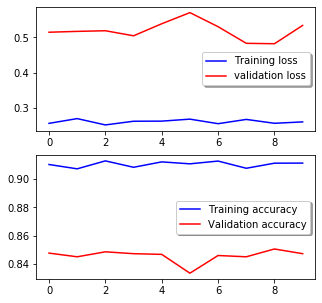

In [44]:
# Plot the loss and accuracy curves for training and validation for last 10 epochs 
fig, ax = plt.subplots(2,1, figsize=(5, 5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
model.save_weights('cifar10_model_2.h5')